In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')
X_val = np.load('data/X_val.npy')
y_val = np.load('data/y_val.npy')

In [ ]:
n_features = X_train.shape[-1]
n_outputs = y_train.shape[-1]
n_features, n_outputs

(16640, 7)

In [ ]:
model_simple = tf.keras.Sequential([
      tf.keras.layers.Conv1D(256, 5, activation = "relu", input_shape = (n_features, 1)),
      tf.keras.layers.MaxPool1D(pool_size = 5, strides = 2),
      tf.keras.layers.Dropout(0.3),

      tf.keras.layers.Conv1D(256, 5, activation = "relu"),
      tf.keras.layers.MaxPool1D(pool_size = 5, strides = 2),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv1D(128, 5, activation = "relu", input_shape = (n_features, 1)),
      tf.keras.layers.MaxPool1D(pool_size = 5, strides = 2, padding = "same"),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv1D(128, 5, activation = "relu", input_shape = (n_features, 1)),
      tf.keras.layers.MaxPool1D(pool_size = 5, strides = 2, padding = "same"),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv1D(64, 5, activation = "relu", input_shape = (n_features, 1)),
      tf.keras.layers.MaxPool1D(pool_size = 5, strides = 2, padding = "same"),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv1D(64, 5, activation = "relu", input_shape = (n_features, 1)),
      tf.keras.layers.MaxPool1D(pool_size = 5, strides = 2),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv1D(32, 5, activation = "relu", input_shape = (n_features, 1)),
      tf.keras.layers.MaxPool1D(pool_size = 5, strides = 2),
      tf.keras.layers.Dropout(0.1),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(n_outputs, activation = "softmax") #output layer
  ])

In [ ]:
model_simple.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 16636, 256)        1536      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 8316, 256)         0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 8316, 256)         0         
                                                                 
 conv1d_8 (Conv1D)           (None, 8312, 256)         327936    
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 4154, 256)         0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 4154, 256)        

In [ ]:
model_simple.compile(
    optimizer = "adam",
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [ ]:
model_attempt = 1

In [ ]:
val_callback = tf.keras.callbacks.EarlyStopping(
    monitor = "val_accuracy",
    min_delta = 0.1,
    patience = 6,
    verbose = 1,
    restore_best_weights = True
)
checkpoint_path = "working/EPOCH:{epoch}-ACCURACY:{val_accuracy}.keras"
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor = "val_accuracy",
    verbose = 1,
    save_freq = "epoch"
)

In [ ]:
history = model_simple.fit(
    X_train, y_train,
    epochs = 50,
    #callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
    #callbacks = [checkpoint],
    validation_split=0.05,
)
model_attempt += 1

Epoch 1/50
225/225 [==============================] - 26s 66ms/step - loss: 2.5345 - accuracy: 0.2116 - val_loss: 2.6586 - val_accuracy: 0.1698
Epoch 2/50
225/225 [==============================] - 6s 25ms/step - loss: 2.1797 - accuracy: 0.2466 - val_loss: 2.1999 - val_accuracy: 0.2255
Epoch 3/50
225/225 [==============================] - 6s 25ms/step - loss: 2.1333 - accuracy: 0.2516 - val_loss: 2.3817 - val_accuracy: 0.1943
Epoch 4/50
225/225 [==============================] - 6s 26ms/step - loss: 2.1137 - accuracy: 0.2558 - val_loss: 2.8604 - val_accuracy: 0.1570
Epoch 5/50
225/225 [==============================] - 6s 25ms/step - loss: 2.0894 - accuracy: 0.2577 - val_loss: 2.1657 - val_accuracy: 0.1776
Epoch 6/50
225/225 [==============================] - 6s 26ms/step - loss: 2.0593 - accuracy: 0.2586 - val_loss: 2.7257 - val_accuracy: 0.1604
Epoch 7/50
225/225 [==============================] - 6s 26ms/step - loss: 2.0212 - accuracy: 0.2634 - val_loss: 2.1038 - val_accuracy: 0.268

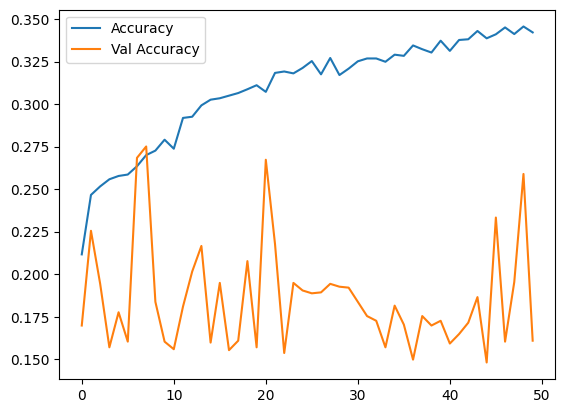

In [ ]:
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Val Accuracy")
plt.legend()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_simple.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

121/121 [==============================] - 2s 12ms/step - loss: 1.5723 - accuracy: 0.3992
Test Loss: 1.5723100900650024
Test Accuracy: 39.92%
